Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("cleaned_dataset.csv")
df = pd.read_pickle("cleaned_dataset.pkl")


C:\Users\malip\AppData\Local\Temp\ipykernel_16024\456550832.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_dataset.csv")


# Task 2 : Visualize Payment Method and Order Status Frequency


In [3]:
df.tail(2)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,Category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584480,905160.0,cod,8/28/2018,MATHUA5AE4D132A2D5A,21599.0,1.0,21899.0,100562351,Mobiles & Tablets,C-PEW-112010,...,cod,8/28/2018,Valid,"21,599",2018.0,8.0,2018-5,8-2018,FY19,106822.0
584491,905171.0,processing,8/28/2018,MATAPP59AD3CFE4A7CA,44459.0,1.0,44759.0,100562360,Mobiles & Tablets,111066,...,cod,8/28/2018,Gross,"44,459",2018.0,8.0,2017-11,8-2018,FY19,67562.0


In [4]:
print(df["payment_method"].nunique())
print(df["payment_method"].unique())

18
['cod' 'ublcreditcard' 'mygateway' 'customercredit' 'cashatdoorstep'
 'mcblite' 'internetbanking' 'marketingexpense' 'productcredit'
 'financesettlement' 'Payaxis' 'jazzvoucher' 'jazzwallet' 'Easypay'
 'Easypay_MA' 'easypay_voucher' 'bankalfalah' 'apg']


In [5]:
payment_count = df["payment_method"].value_counts()
payment_count

payment_method
cod                  221264
Payaxis               80369
Easypay               57083
jazzwallet            30451
easypay_voucher       25987
jazzvoucher           13157
Easypay_MA             8527
customercredit         5223
bankalfalah            1505
ublcreditcard           882
cashatdoorstep          732
mcblite                 721
mygateway               669
internetbanking         472
productcredit           125
apg                      99
marketingexpense         45
financesettlement        15
Name: count, dtype: int64

In [6]:
payment_percentage = payment_count/payment_count.sum() * 100
payment_percentage

payment_method
cod                  49.463702
Payaxis              17.966539
Easypay              12.760939
jazzwallet            6.807340
easypay_voucher       5.809410
jazzvoucher           2.941255
Easypay_MA            1.906216
customercredit        1.167605
bankalfalah           0.336444
ublcreditcard         0.197172
cashatdoorstep        0.163639
mcblite               0.161180
mygateway             0.149555
internetbanking       0.105516
productcredit         0.027944
apg                   0.022132
marketingexpense      0.010060
financesettlement     0.003353
Name: count, dtype: float64

Visualizing Payments Method

In [7]:
major_methods = payment_percentage[payment_percentage >= 2]
others_sum = payment_percentage[payment_percentage < 2].sum()

In [8]:
payment_final = major_methods.copy()
payment_final['Others'] = others_sum

C:\Users\malip\AppData\Local\Temp\ipykernel_16024\1766894366.py:39: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0,0), 0.7, color='#0e1117', edgecolor='white', linewidth=0.5)


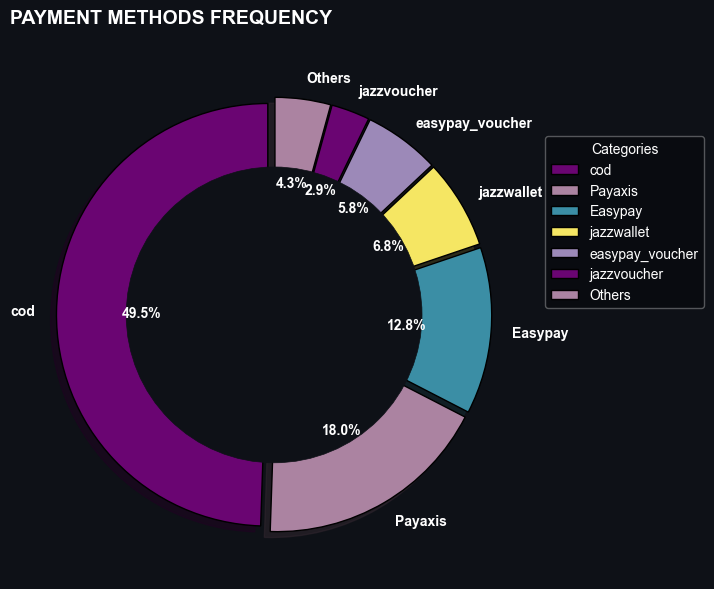

In [9]:

sns.set_style("darkgrid")
plt.style.use('dark_background')

dark_palette = ["#6A0572", "#AB83A1", "#3B8EA5", "#F5E663", "#9C89B8"]

plt.figure(figsize=(8, 6), facecolor='#0e1117') 
plt.pie(
    payment_final,
    labels=payment_final.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.03] * len(payment_final), 
    shadow=True,
    colors=dark_palette,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    textprops={'color': 'white', 'fontweight': 'bold'}
)


plt.title(
    'PAYMENT METHODS FREQUENCY', 
    fontsize=14, 
    fontweight='bold', 
    color='white',
    pad=20,
    loc='left'
)

plt.legend(
    payment_final.index,
    title="Categories",
    bbox_to_anchor=(1, 0.5),
    loc='lower left',
    frameon=True,
    framealpha=0.3,
    edgecolor='white'
)

centre_circle = plt.Circle((0,0), 0.7, color='#0e1117', edgecolor='white', linewidth=0.5)
plt.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

This Pie Chart indicates that approx 50% customers prefer COD while Purchasing Goods

In [10]:
print(df["status"].nunique())
print(df["status"].unique())

16
['complete' 'canceled' 'order_refunded' 'received' 'refund' 'closed'
 'fraud' 'holded' 'exchange' 'pending_paypal' 'paid' '\\N' 'cod' 'pending'
 'processing' 'payment_review']


In [11]:
status_count = df["status"].value_counts()
status_count

status
complete          205378
canceled          141434
order_refunded     48180
received           43102
refund              6366
cod                 1730
paid                 657
closed               411
payment_review        26
fraud                 10
pending                9
pending_paypal         7
holded                 6
exchange               4
\N                     4
processing             2
Name: count, dtype: int64

Converting into Percentage

In [12]:
status_percentage = status_count/status_count.sum()*100
status_percentage

status
complete          45.912377
canceled          31.617657
order_refunded    10.770668
received           9.635478
refund             1.423123
cod                0.386743
paid               0.146873
closed             0.091879
payment_review     0.005812
fraud              0.002236
pending            0.002012
pending_paypal     0.001565
holded             0.001341
exchange           0.000894
\N                 0.000894
processing         0.000447
Name: count, dtype: float64

In [13]:
major_method = status_percentage[status_percentage >= 2]
other_sum =status_percentage[status_percentage < 2].sum()

In [14]:
payment_finals = major_method.copy()
payment_finals['Other'] = other_sum

Visualizing Order Status Frequency

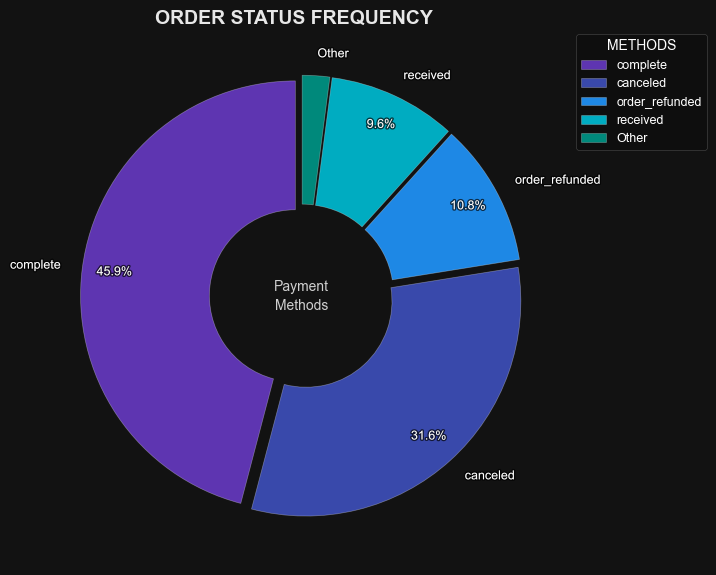

In [15]:
from matplotlib.patheffects import withStroke


plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

fig, ax = plt.subplots(figsize=(8, 6), facecolor='#121212')
colors = ['#5e35b1', '#3949ab', '#1e88e5', '#00acc1', '#00897b', '#43a047']

wedges, texts, autotexts = ax.pie(
    payment_finals,
    labels=payment_finals.index,
    autopct=lambda p: f'{p:.1f}%' if p > 3 else '',
    startangle=90,
    colors=colors,
    explode=[0.03 if val > 0.02 else 0 for val in payment_finals],
    wedgeprops={'linewidth': 0.5, 'edgecolor': '#ffffff55', 'width': 0.6},  
    textprops={'fontsize': 9, 'fontweight': 'medium', 'color': 'white'},
    pctdistance=0.85,
    labeldistance=1.1
)


for text in texts + autotexts:
    text.set_path_effects([withStroke(linewidth=2, foreground='#000000aa')])

ax.text(0, 0, 'Payment\nMethods', 
        ha='center', va='center',
        fontsize=10, color='white', alpha=0.8,
        linespacing=1.4)


legend = ax.legend(wedges, payment_finals.index,
                 title="METHODS",
                 loc='upper left',
                 bbox_to_anchor=(1, 1),
                 frameon=True,
                 framealpha=0.2,
                 edgecolor='white',
                 title_fontsize=10,
                 fontsize=9)
legend.get_frame().set_linewidth(0.5)

ax.grid(True, color='#ffffff15', linestyle='--', linewidth=0.5)

ax.set_aspect('equal')
fig.suptitle('ORDER STATUS FREQUENCY', 
            y=0.95,
            fontsize=14,
            fontweight='bold',
            color='white',
            alpha=0.9)

plt.tight_layout()
plt.subplots_adjust(right=1)  
plt.show()

This Pie Chart is illustrating that just  46% of entire orders were completed

# Task 3 • Find a correlation between payment method and order status

In [16]:
cross_table = pd.crosstab(
    df["payment_method"],
    df["status"],
    margins= True,
    margins_name="Total"
)
cross_table.head(5)

status,\N,canceled,closed,cod,complete,exchange,fraud,holded,order_refunded,paid,payment_review,pending,pending_paypal,processing,received,refund,Total
payment_method,,,,,,,,,,,,,,,,,
Easypay,0,35731,16,0,15624,0,0,0,1948,170,0,0,0,0,3027,567,57083
Easypay_MA,0,5133,0,0,2646,0,0,0,218,13,0,0,0,0,415,102,8527
Payaxis,0,51362,68,0,18884,0,9,0,3350,299,0,0,0,0,5991,406,80369
apg,0,60,0,0,0,0,0,0,2,0,0,0,0,0,34,3,99
bankalfalah,0,670,0,0,31,0,0,0,63,9,26,0,0,0,703,3,1505


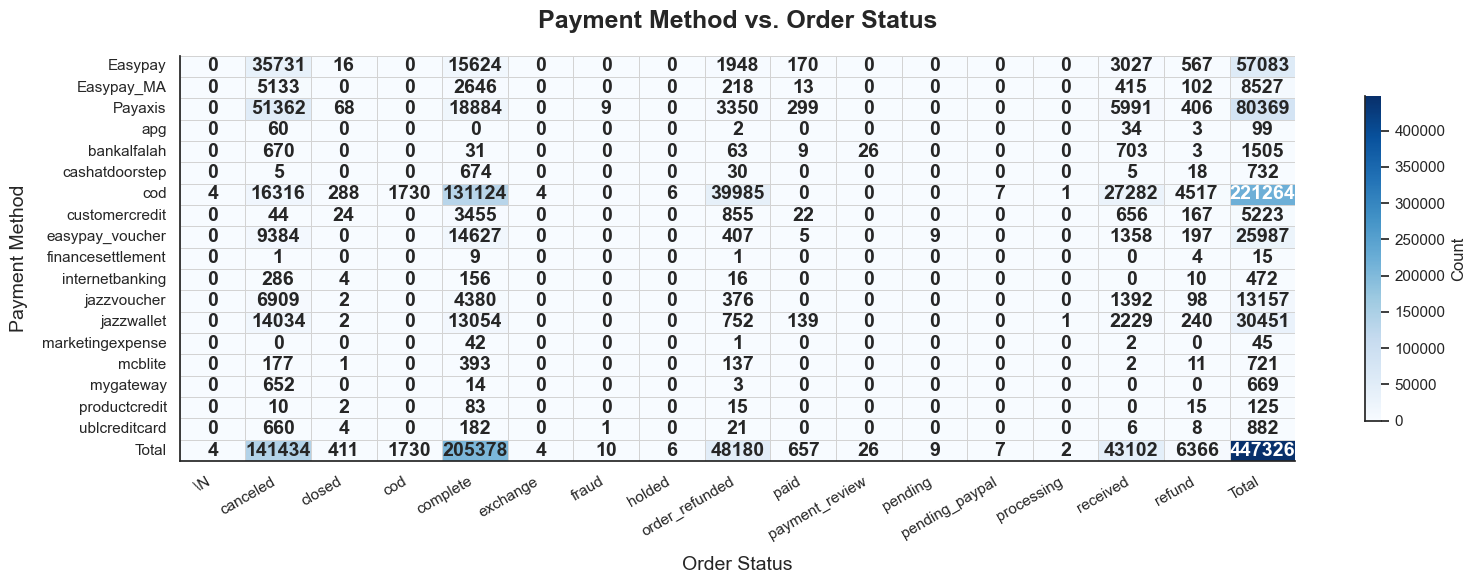

In [17]:
sns.set_theme(style="white")

plt.figure(figsize=(16, 6))  


sns.heatmap(
    cross_table,
    annot=True,
    fmt='d',
    cmap="Blues",
    linewidths=0.7,
    linecolor='lightgray',
    annot_kws={"size": 14, "weight": "bold"},  
    cbar_kws={'shrink': 0.8, 'label': 'Count'}
)


plt.title("Payment Method vs. Order Status", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Order Status", fontsize=14, labelpad=10)
plt.ylabel("Payment Method", fontsize=14, labelpad=10)
plt.xticks(rotation=30, ha='right')
sns.despine()
plt.tight_layout()
plt.show()


This Heatmap simply shows the correlation of Payment methods vs Order status .It elaborates the perfect correlation between COD and completed orders 

# Task 4 • Find a correlation between Month and Category

In [18]:
cross_table_2 = pd.crosstab(
    df["Month"],
    df["Category"],
    margins= True,
    margins_name="Total"
)
cross_table_2.tail(3)

Category,Appliances,Beauty & Grooming,Books,Computing,Entertainment,Health & Sports,Home & Living,Kids & Baby,Men's Fashion,Mobiles & Tablets,Others,School & Education,Soghaat,Superstore,Women's Fashion,\N,Total
Month,,,,,,,,,,,,,,,,,
11.0,20774,10757,202,5259,7547,3026,9018,2958,32075,31243,1457,454,7446,6994,13327,2914,155451
12.0,2611,2964,114,767,623,992,1408,1226,5771,5254,192,235,2656,935,3152,296,29196
Total,40274,33208,1448,12038,20425,11488,20743,13377,75883,90790,5518,2721,30372,35550,45666,7825,447326


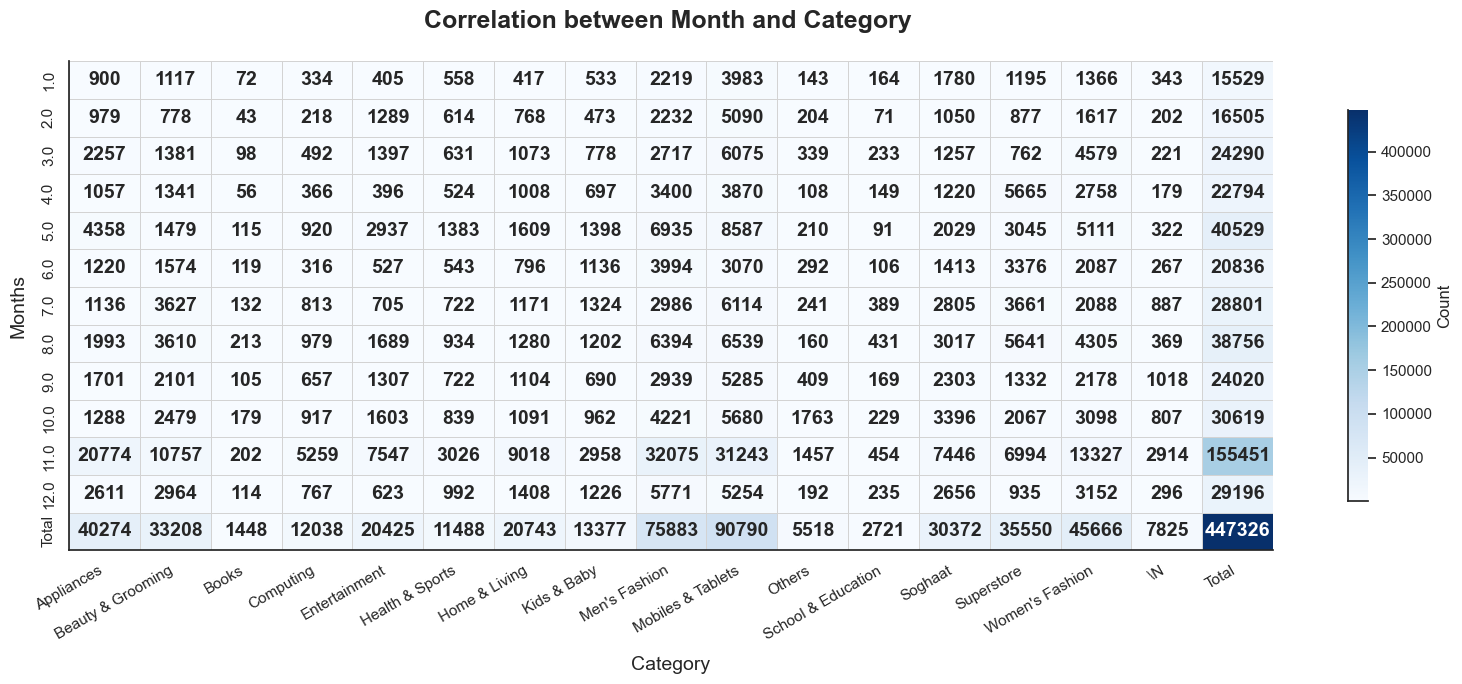

In [19]:

plt.figure(figsize=(16, 7))

sns.set_theme(style="white")
sns.heatmap(
    cross_table_2,
    annot=True,
    fmt='d',
    cmap="Blues",           
    linewidths=0.7,
    linecolor='lightgray',
    annot_kws={"size": 14, "weight": "bold"},
    cbar_kws={'shrink': 0.8, 'label': 'Count'}
)


plt.title("Correlation between Month and Category ", fontsize=18, fontweight='bold', pad=24)
plt.xlabel("Category", fontsize=14, labelpad=10)
plt.ylabel("Months", fontsize=14, labelpad=10)


plt.xticks(rotation=30, ha='right')

sns.despine()

plt.tight_layout()
plt.show()


This Heatmap simply shows the correlation between Months and Category .It elaborates the perfect correlation between  Months and Category 

In [20]:
df["Month"].value_counts()

Month
11.0    155451
5.0      40529
8.0      38756
10.0     30619
12.0     29196
7.0      28801
3.0      24290
9.0      24020
4.0      22794
6.0      20836
2.0      16505
1.0      15529
Name: count, dtype: int64

In [21]:
df["Category"].value_counts()

Category
Mobiles & Tablets     90790
Men's Fashion         75883
Women's Fashion       45666
Appliances            40274
Superstore            35550
Beauty & Grooming     33208
Soghaat               30372
Home & Living         20743
Entertainment         20425
Kids & Baby           13377
Computing             12038
Health & Sports       11488
\N                     7825
Others                 5518
School & Education     2721
Books                  1448
Name: count, dtype: int64

Orders Monthly Count

In [22]:
monthly_counts = df.groupby("Month")["item_id"].count()
monthly_counts

Month
1.0      15529
2.0      16505
3.0      24290
4.0      22794
5.0      40529
6.0      20836
7.0      28801
8.0      38756
9.0      24020
10.0     30619
11.0    155451
12.0     29196
Name: item_id, dtype: int64

Visualizing Monthly Orders by Counts 

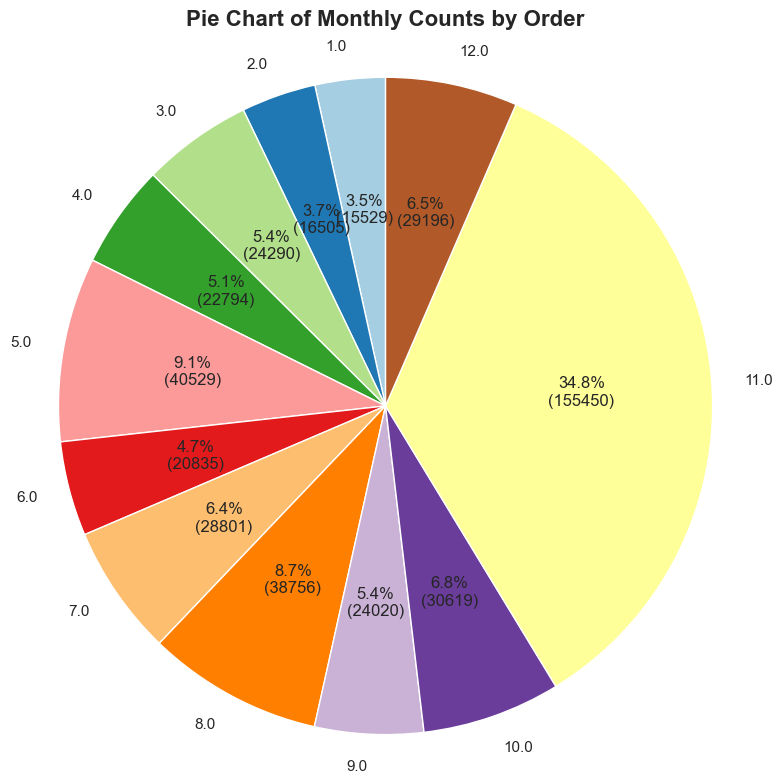

In [23]:
plt.figure(figsize=(8, 8))


colors = plt.cm.Paired(range(len(monthly_counts)))


plt.pie(
    monthly_counts,
    labels=monthly_counts.index,
    autopct=lambda p: f"{p:.1f}%\n({int(p*sum(monthly_counts)/100)})", 
    startangle=90,       
    colors=colors,       
    wedgeprops={"edgecolor": "white"}  
)


plt.title("Pie Chart of Monthly Counts by Order", fontsize=16, fontweight='bold', pad=15)
plt.axis("equal")
plt.tight_layout()
plt.show()


In [24]:
yearly_counts = df.groupby("Year")["item_id"].count()
yearly_counts

Year
2016.0    133901
2017.0    290891
2018.0     22534
Name: item_id, dtype: int64

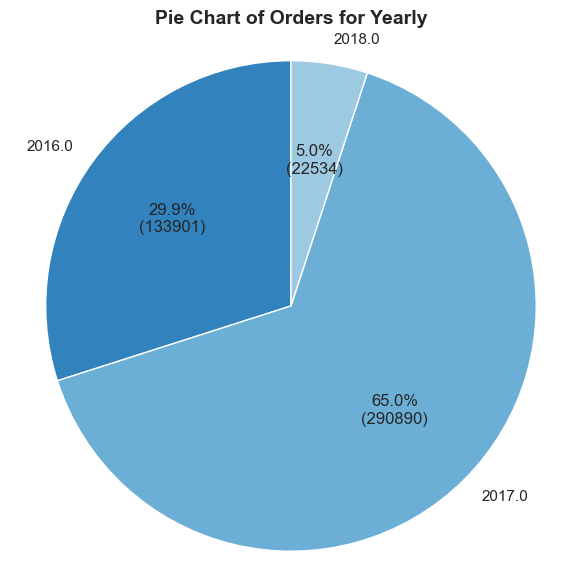

In [25]:
from gc import freeze


plt.figure(figsize=(6, 6))


colors = plt.cm.tab20c(range(len(yearly_counts)))

plt.pie(
    yearly_counts,
    labels=yearly_counts.index,
    autopct=lambda p: f"{p:.1f}%\n({int(p*sum(yearly_counts)/100)})", 
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1}  
)


plt.title("Pie Chart of Orders for Yearly", fontsize=14, fontweight='bold', pad=10)
plt.axis("equal")
plt.tight_layout()
plt.show()


In [26]:
df.to_csv("second_cleaned_dataset.csv", index=False)
df.to_pickle("second_cleaned_dataset.pkl")
